### **Supervised ML - Decision Trees & Ensemble Methods**

Install the packages for this practical sessions
- https://xgboost.readthedocs.io/en/stable/index.html
- https://catboost.ai/

In [ ]:
!pip install xgboost
!pip install catboost

Load intial core packages

In [160]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

The data is related with direct marketing campaigns of a Portuguese banking institution. 

The marketing campaigns were based on phone calls. 

Often, more than one contact to the same client was required, in order to access **if the product (bank term deposit) would be ('yes') or not ('no') subscribed**.

Data Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


#### Output variable (desired target):
16. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [161]:
df = pd.read_csv("datasets/banks-uci/bank-full.csv", sep=";")
df = df.rename(columns={"y": "subscribed"})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


checking for empty cells

In [162]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


encode categorical data

In [164]:
x_encoder = OrdinalEncoder()
y_encoder = LabelEncoder() 

In [165]:
#duplicate dataframe
df_new = df

print(df_new.columns)
print("----------------------")
df_new.info()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  pr

In [166]:
df_new['subscribed'] = y_encoder.fit_transform(df_new['subscribed'])
df_new[['job', 'marital', 'education', 'default','housing',
       'loan', 'contact', 'month', 'poutcome']] = x_encoder.fit_transform(df_new[['job', 'marital', 'education', 'default','housing',
       'loan', 'contact', 'month', 'poutcome']])

df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0


In [167]:
df_new.subscribed.value_counts()

#we observe a class imbalance - we will ignore this for this practical context

0    39922
1     5289
Name: subscribed, dtype: int64

In [168]:
df_new.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [169]:
x_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
print(x_columns)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [170]:
X = df_new[x_columns]
Y = df_new['subscribed']

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100, 
                                                    shuffle=True, stratify=Y)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(31647, 16) (31647,)
(13564, 16) (13564,)


In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### **XGBoost**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

The context is binary: 
- 0 - No
- 1 - Yes

In [173]:
y_encoder.classes_

array(['no', 'yes'], dtype=object)

In [174]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')


In [175]:
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [176]:
xgb_Pred = model_xgb.predict(X_test)

In [177]:
print(classification_report(Y_test, xgb_Pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.59      0.14      0.22      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.56      0.58     13564
weighted avg       0.86      0.89      0.86     13564



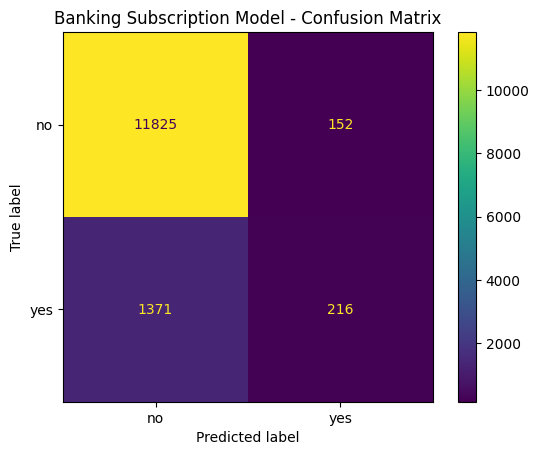

In [178]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, xgb_Pred), display_labels=y_encoder.classes_).plot()
plt.title("Banking Subscription Model - Confusion Matrix")
plt.show()

### **CatBoost**


CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

Developed by Yandex researchers and engineers, it is the successor of the MatrixNet algorithm that is widely used within the company for ranking tasks, forecasting and making recommendations. It is universal and can be applied across a wide range of areas and to a variety of problems.


Original author(s): Andrey Gulin: (Yandex)

In [179]:
from catboost import CatBoostClassifier, Pool, metrics, cv


model_catB = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()], #from catboost
    random_seed=42,
    logging_level='Silent'
)

In [180]:
#remember we created an encoder to convert categorical predictors to numbers
x_encoder.feature_names_in_

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome'], dtype=object)

In [181]:
modelCatHistory = model_catB.fit(
    X_train, Y_train,
    #cat_features=x_encoder.feature_names_in_,
    eval_set=(X_test, Y_test),
    logging_level='Verbose',  # you can uncomment this for text output
)

Learning rate set to 0.074386
0:	learn: 0.6118517	test: 0.6117147	best: 0.6117147 (0)	total: 12ms	remaining: 12s
1:	learn: 0.5412310	test: 0.5415641	best: 0.5415641 (1)	total: 23.4ms	remaining: 11.7s
2:	learn: 0.4815552	test: 0.4819971	best: 0.4819971 (2)	total: 35.8ms	remaining: 11.9s
3:	learn: 0.4486238	test: 0.4491470	best: 0.4491470 (3)	total: 48.2ms	remaining: 12s
4:	learn: 0.4119459	test: 0.4124988	best: 0.4124988 (4)	total: 60.5ms	remaining: 12s
5:	learn: 0.3851411	test: 0.3857712	best: 0.3857712 (5)	total: 72.3ms	remaining: 12s
6:	learn: 0.3571278	test: 0.3577725	best: 0.3577725 (6)	total: 86.7ms	remaining: 12.3s
7:	learn: 0.3352487	test: 0.3357906	best: 0.3357906 (7)	total: 102ms	remaining: 12.6s
8:	learn: 0.3181378	test: 0.3186272	best: 0.3186272 (8)	total: 118ms	remaining: 13s
9:	learn: 0.3088086	test: 0.3093140	best: 0.3093140 (9)	total: 134ms	remaining: 13.3s
10:	learn: 0.2970445	test: 0.2977397	best: 0.2977397 (10)	total: 147ms	remaining: 13.2s
11:	learn: 0.2882399	test: 

In [195]:
#model evaluation results appears in a dictionary form - with keys and its corresponding set of values
modelCatHistory.evals_result_.keys()

dict_keys(['learn', 'validation'])

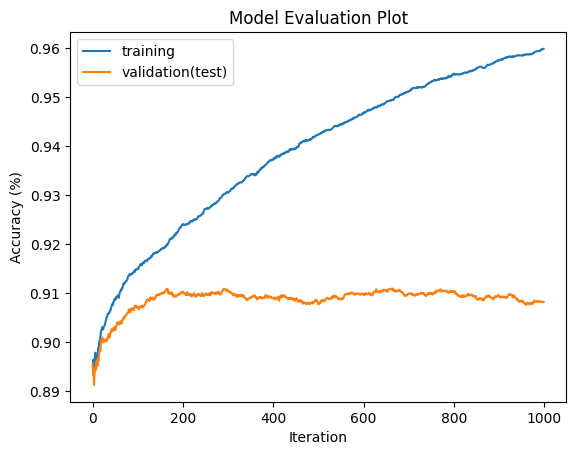

In [199]:
plt.plot(modelCatHistory.evals_result_['learn']['Accuracy'], label='training')
plt.plot(modelCatHistory.evals_result_['validation']['Accuracy'], label='validation(test)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Model Evaluation Plot')
plt.legend()


In [205]:
#what's the key for obtaining the model loss?
modelCatHistory.evals_result_['learn'].keys()

dict_keys(['Accuracy', 'Logloss'])

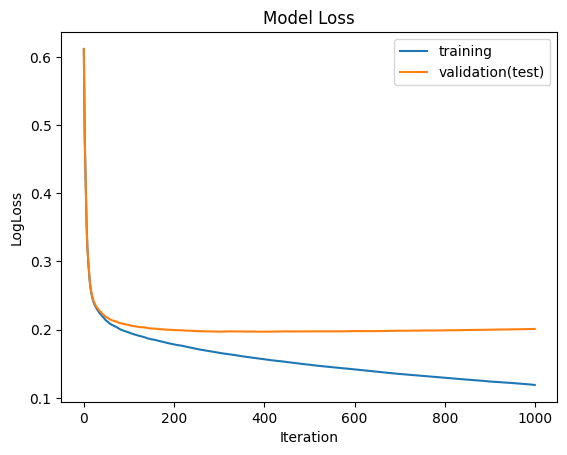

In [206]:
plt.plot(modelCatHistory.evals_result_['learn']['Logloss'], label='training')
plt.plot(modelCatHistory.evals_result_['validation']['Logloss'], label='validation(test)')
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Model Loss')
plt.legend()

In [182]:
print("Count of trees in model = {}".format(model_catB.tree_count_))

Count of trees in model = 296


In [183]:
print(model_catB.get_best_iteration())


295


In [184]:
model_catB.get_best_score()

{'learn': {'Accuracy': 0.959901412456157, 'Logloss': 0.11890406704196964},
 'validation': {'Accuracy': 0.9109407254497198, 'Logloss': 0.1969052095715387}}

In [185]:
model_catB.best_score_

{'learn': {'Accuracy': 0.959901412456157, 'Logloss': 0.11890406704196964},
 'validation': {'Accuracy': 0.9109407254497198, 'Logloss': 0.1969052095715387}}

In [186]:
cat_Pred = model_catB.predict(X_test)

In [187]:
print(classification_report(Y_test, cat_Pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11977
           1       0.67      0.46      0.55      1587

    accuracy                           0.91     13564
   macro avg       0.80      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564



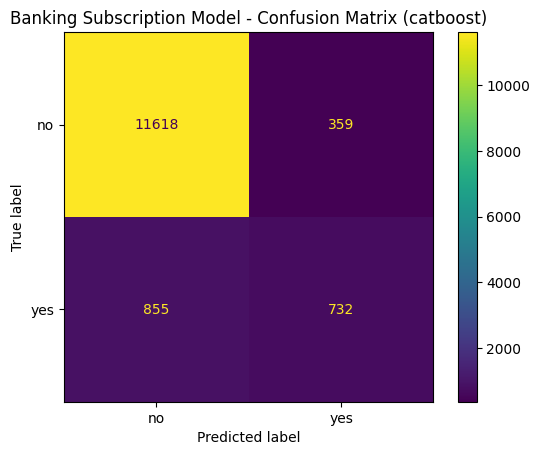

In [188]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, cat_Pred), display_labels=y_encoder.classes_).plot()
plt.title("Banking Subscription Model - Confusion Matrix (catboost)")
plt.show()

The model can be improved by tweaking the hyperparameters.

For example, the **learning_rate**